In [4]:
%matplotlib inline
import os
import pandas
import pickle
import seaborn

In [2]:
EVENT_TYPE = ["problem", "video", "access", "wiki", "discussion",
              "navigate", "page_close"]

## Read data

In [5]:
def get_input_filenames(input_dirpath, extension):
    """Returns the names of the files in input_dirpath that matches pattern."""
    all_files = os.listdir(input_dirpath)
    result = []
    for filename in all_files:
        if filename.endswith(extension) and os.path.isfile(os.path.join(
                input_dirpath, filename)):
            result.append(os.path.join(input_dirpath, filename))
    return result

In [56]:
input_filenames = get_input_filenames('/home/mteruel/edm/data/kddcup2015/clean/log_train.csv/', '.csv')
df_from_each_file = (pandas.read_csv(f, header=0, parse_dates=['time'], infer_datetime_format=True)
                     for f in input_filenames)
sequences = pandas.concat(df_from_each_file, ignore_index=True)

In [38]:
input_filenames = get_input_filenames('/home/mteruel/edm/data/kddcup2015/clean/enrollment_train.csv/', '.csv')
df_from_each_file = (pandas.read_csv(f, header=0, usecols=['course_id', 'enrollment_id']) for f in input_filenames)
courses = pandas.concat(df_from_each_file, ignore_index=True)

In [52]:
labels = pandas.read_csv('/home/mteruel/edm/data/kddcup2015/truth_train.csv', 
                         names=['enrollment_id', 'dropout'])

In [57]:
sequences = sequences.merge(courses, on='enrollment_id', how='left')
sequences = sequences.merge(labels, on='enrollment_id', how='left')

In [122]:
sequences.course_id.unique()

array([  8.,   6.,   7.,  28.,  36.,  33.,  30.,  16.,  17.,   0.,  18.,
        34.,  11.,  21.,  26.,  25.,  23.,   9.,   3.,  38.,   1.,  13.,
         4.,  15.,  37.,  22.,  32.,  10.,   5.,  31.,  29.,  12.,  35.,
        14.,  20.,   2.,  27.,  19.,  24.])

## Divide in periods

In [61]:
PERIOD_SIZE = 4

In [174]:
sequences2 = sequences[sequences.course_id == 11lambda x: '-'.join(x), axis=1)]
sequences2[:3]

,enrollment_id,time,source,event,object,course_id,dropout
7478,147821,2013-12-27 03:56:34,server,navigate,5887.0,11.0,1
7479,147821,2013-12-27 03:58:01,server,navigate,5887.0,11.0,1
7480,147821,2013-12-27 03:58:16,server,navigate,5772.0,11.0,1


In [175]:
min_time = sequences2['time'].min()

In [176]:
sequences2['time_lapsed'] = sequences2['time'] - min_time
sequences2['days_lapsed'] = sequences2['time_lapsed'].apply(lambda date: date.days)

/home/mteruel/miniconda3/envs/env_edm2/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/mteruel/miniconda3/envs/env_edm2/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Distribution of activity per day

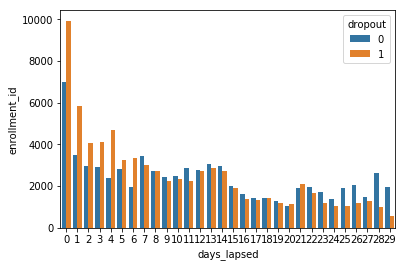

In [177]:
counts_per_day = sequences2.groupby(
    ['days_lapsed', 'dropout']).count()
seaborn.barplot(data=counts_per_day.reset_index(), x='days_lapsed', y='enrollment_id', hue='dropout')

### Last day of activity

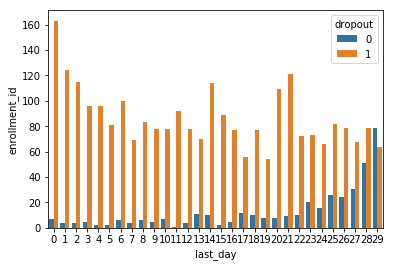

In [178]:
last_day_df = sequences2[['enrollment_id', 'days_lapsed', 'dropout']].groupby(
    'enrollment_id').max().rename(columns={'days_lapsed':'last_day'}).reset_index()
seaborn.barplot(data=last_day_df.groupby(['last_day', 'dropout']).count().reset_index(),
                x='last_day', y='enrollment_id', hue='dropout')

### First day of activity

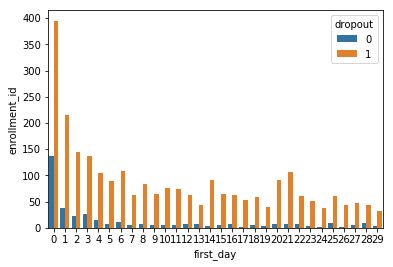

In [179]:
first_day_df = sequences2[['enrollment_id', 'days_lapsed', 'dropout']].groupby(
            'enrollment_id').min().rename(columns={'days_lapsed':'first_day'}).reset_index()
seaborn.barplot(data=first_day_df.groupby(['first_day', 'dropout']).count().reset_index(),
                x='first_day', y='enrollment_id', hue='dropout')

In [167]:
(last_day_df.last_day >= 15).astype(int)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4866    1
4867    1
4868    1
4869    1
4870    1
4871    1
4872    1
4873    1
4874    1
4875    1
4876    1
4877    1
4878    1
4879    1
4880    1
4881    1
4882    1
4883    1
4884    1
4885    1
4886    1
4887    1
4888    1
4889    1
4890    1
4891    1
4892    1
4893    1
4894    1
4895    1
Name: last_day, Length: 4896, dtype: int64